<a href="https://colab.research.google.com/github/mejia-b/Deep-Learning-Course/blob/main/MNIST_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part A

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"The number of images in training set: {x_train.shape[0]}")
print(f"The number of images in testing set: {x_test.shape[0]}")
print(f"Image width and height: {x_train.shape[1]} {x_train.shape[2]}")


11490434/11490434 [==============================] - 0s 0us/step
The number of images in training set: 60000
The number of images in testing set: 10000
Image width and height: 28 28


## Part B

In [ ]:
def img_plt(images, labels):
  plt.figure() # figsize = (15,8)
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:],cmap='gray')
    plt.title(f'label: {labels[i-1]}')
  plt.show()



## Part C

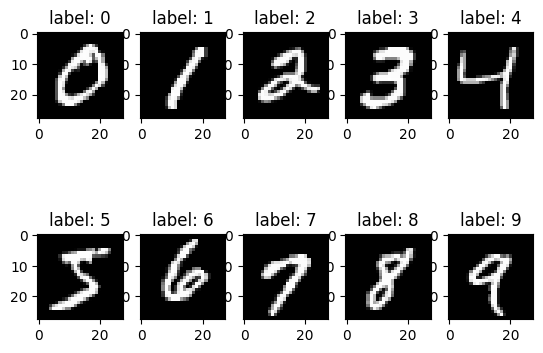

In [ ]:
x_train_rnd = np.zeros((10,28,28)) # A 3d array filled with zeros
y_train_rnd = np.arange(10) # An array with indexes 0 - 9

for digit in range(10):
  # x_train contains all the images from 0 - 9
  # Grabs each 28 by 28 array where the y_train value is equal to the current digit in the for loop
  # At each iteration when the value is for example a digit 0 then it grabs all images where the digit is zero which in this example would be a total of 5923 images with digit 0
  # So x_train_d will contain thousands of images with the specified value
  x_train_d = x_train[y_train==digit,:,:]

  # Since x_train_d will contain several arrays with the same specified value we only select the one at index 0
  # and store that 2d array at the specified index in x_train_rnd
  x_train_rnd[digit,:,:] = x_train_d[0,:,:]

img_plt(x_train_rnd,y_train_rnd)


## Part D, E, and F

In [ ]:
# -------- PART D --------
# Training set digits 0 and 8
x_train_01 = x_train[np.logical_or(y_train==0, y_train==8),:,:]
y_train_01 = y_train[np.logical_or(y_train==0, y_train==8)]


# Testing set digits 0 and 8
x_test_01 = x_test[np.logical_or(y_test==0, y_test==8),:,:]
y_test_01 = y_test[np.logical_or(y_test==0, y_test==8)]




# -------- PART E --------
# Shuffle the images
num_train_img = x_train_01.shape[0]
train_ind = np.arange(0,num_train_img)
print(f"Number of total images in training set before splitting: {num_train_img}")

# training indices shuffled
train_ind_s = np.random.permutation(train_ind) # returns an array with the indices shuffled


x_train_01 = x_train_01[train_ind_s,:,:] # this can either take an array with the indices or a range of indices
y_train_01 = y_train_01[train_ind_s]

# Select 500  random validation images
x_valid_01 = x_train_01[0:500,:,:]
y_valid_01 = y_train_01[0:500]
print(f"Number of images in validation set: {x_valid_01.shape[0]}")

# The remaining images will be used for the training set
x_train_01 = x_train_01[500:,:,:]
y_train_01 = y_train_01[500:]
print(f"Number of images in training set: {x_train_01.shape[0]}")

# Total images in testing set
print(f"Number of imags in testing set: {x_test_01.shape[0]}")



Number of total images in training set before splitting: 11774
Number of images in validation set: 500
Number of images in training set: 11274
Number of imags in testing set: 1954


## Part G

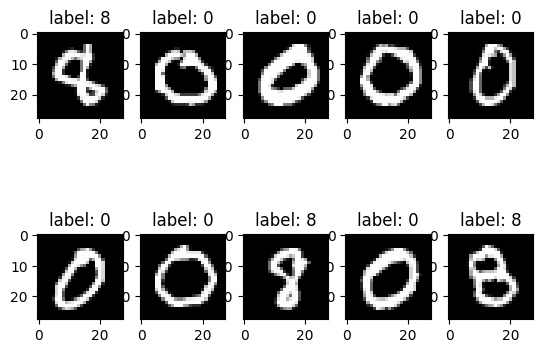

In [ ]:
# Plot 10 images from validation set
img_plt(x_valid_01,y_valid_01)

## Part H

In [ ]:
# Extracting the 4x4 center of 10 images in the training set
# x_train_01_center = x_train_01[0:10, 12:16, 12:16]
# img_plt(x_train_01[0:10,:,:], y_train_01[0:10])
# img_plt(x_train_01_center,y_train_01)

# TRAINING SET
# sums each pixel across the 2nd axis of the 4x4 center of each image
train_features = np.sum(x_train_01[:,12:16,12:16],axis=2)
train_features = np.sum(train_features,axis=1)/4

# VALIDATION SET
valid_features = np.sum(x_valid_01[:,12:16,12:16],axis=2)
valid_features = np.sum(valid_features,axis=1)/4


# TESTING SET
test_features = np.sum(x_test_01[:,12:16,12:16],axis=2)
test_features = np.sum(test_features,axis=1)/4

print(f"Training features total: {train_features.shape[0]}")
print(f"Validation features total: {valid_features.shape[0]}")
print(f"Testing features total: {test_features.shape[0]}")


Training features total: 11274
Validation features total: 500
Testing features total: 1954


## Part I

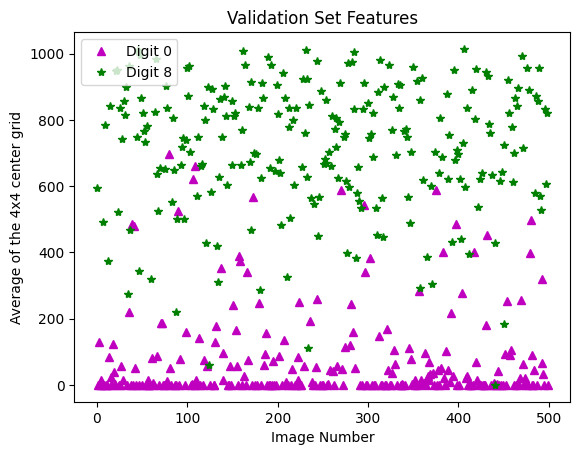

(500,)


In [ ]:
def feat_plt(feature,labels,feature_name):
  plt.figure()
  sample_nums = np.arange(feature.shape[0])
  plt.plot(sample_nums[labels==0],feature[labels==0],'m^', sample_nums[labels==8], feature[labels==8],'g*')
  plt.legend([f"Digit {0}", f"Digit {8}"])
  plt.xlabel("Image Number")
  plt.ylabel("Average of the 4x4 center grid")
  plt.title(f"{feature_name} Set Features")
  plt.show()


feat_plt(valid_features,y_valid_01,"Validation")
print(valid_features.shape)

## Part J  
If I had to guess a threshold that would give the highest accuracy, I would say somewhere around 400.

## Part K

In [ ]:
def acc_fun(actual_labels, predicted_labels):
  acc = np.sum(actual_labels == predicted_labels)/len(actual_labels)*100
  acc = round(acc,2)
  return acc

# Create arrays containing zeros for the predictions
y_train_01_pred = np.zeros(train_features.shape)
y_valid_01_pred = np.zeros(valid_features.shape)
y_test_01_pred = np.zeros(test_features.shape)

# Training Accuracy
threshold = 400
print(f"The selected threshold is: {threshold}")

y_train_01_pred[train_features>threshold] = 8
y_train_01_pred[train_features<=threshold] = 0
training_accuracy = acc_fun(y_train_01,y_train_01_pred)
print(f"Training accuracy: {training_accuracy}")


# Validation Accuracy
y_valid_01_pred[valid_features>threshold] = 8
y_valid_01_pred[valid_features<=threshold] = 0
validation_accuracy = acc_fun(y_valid_01,y_valid_01_pred)
print(f"Validation accuracy: {validation_accuracy}")

# Testing Accuracy
y_test_01_pred[test_features>threshold] = 8
y_test_01_pred[test_features<=threshold] = 0
testing_accuracy = acc_fun(y_test_01,y_test_01_pred)
print(f"Testing accuracy: {testing_accuracy}")

The selected threshold is: 400
Training accuracy: 93.76
Validation accuracy: 93.6
Testing accuracy: 95.65
